Dataset from Canvas (`Titanic_Passengers.csv`)

In [134]:
import pandas as pd
passengers_df = pd.read_csv('../data/Titanic_Passengers.csv')
passengers_df.head()

,Name,Born,Died,Age,Gender,Passenger_Class,Lived_Died,Fare,Fare_decimal
0,"DEAN, Miss Elizabeth Gladys Millvina",1912.0,2009.0,0.166667,Female,3,lived,£20 11s 6d,20.58
1,"DANBOM, Master Gilbert Sigvard Emanuel",1911.0,1912.0,0.333333,Male,3,died,£14 8s,14.40
2,"TANNūS, Master As'ad",1911.0,1931.0,0.416667,Male,3,lived,£8 10s 4d,8.52
3,"PEACOCK, Master Albert Edward",1911.0,1912.0,0.583333,Male,3,died,£13 15s 6d,13.78
4,"RICHARDS, Master Sibley George",1911.0,1987.0,0.750000,Male,2,lived,£18 15s,18.75


- What kind of data is the `dependent` variable?
	- 
- What kind of data is the `gender` (indep. variable)
	- Nominal

Two types:
- `Ordinal` data. Data tjat can be ordered
- `Categorical/nominal`. Data that cannot be ordered

In [135]:
# Margins = True will show the summary 
contingency_table = pd.crosstab(passengers_df['Gender'], passengers_df['Lived_Died'])
print(contingency_table)

Lived_Died  died  lived
Gender                 
Female       143    339
Male         709    161


<Axes: xlabel='Gender'>

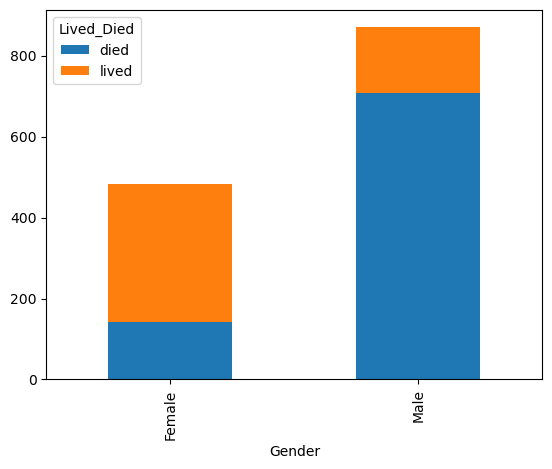

In [136]:
# Task: Create a stacked bar chart showing the number of passenger by gender that lived or died
import matplotlib.pyplot as plt
import seaborn as sns
contingency_table.plot(kind='bar', stacked=True)

                       

In [137]:
from scipy import stats # for chi2_contingency
print(stats.chi2_contingency(contingency_table.iloc[0:3]))

# you get 3 values back:
# 1) Chi-Squared: The higher the chi-squared statstics, the less likelihood that observed values were the result of pure chance
# 2) Target P-value (0.05): If the p-value is less than 0.05, then we can reject the null hypothesis that the variables are independent.
# 3) Degrees of freedom: 1 degree of freedom. (2 rows -1) * (2 columns -1) = 1

Chi2ContingencyResult(statistic=355.24355436145913, pvalue=3.0570688722545846e-79, dof=1, expected_freq=array([[303.74556213, 178.25443787],
       [548.25443787, 321.74556213]]))


## Chi-Square Example: Was Age relevant?

In [138]:
# first check the age column it is already fixed to be the age at the time of the accident
passengers_df.head()
# what about null values?

,Name,Born,Died,Age,Gender,Passenger_Class,Lived_Died,Fare,Fare_decimal
0,"DEAN, Miss Elizabeth Gladys Millvina",1912.0,2009.0,0.166667,Female,3,lived,£20 11s 6d,20.58
1,"DANBOM, Master Gilbert Sigvard Emanuel",1911.0,1912.0,0.333333,Male,3,died,£14 8s,14.40
2,"TANNūS, Master As'ad",1911.0,1931.0,0.416667,Male,3,lived,£8 10s 4d,8.52
3,"PEACOCK, Master Albert Edward",1911.0,1912.0,0.583333,Male,3,died,£13 15s 6d,13.78
4,"RICHARDS, Master Sibley George",1911.0,1987.0,0.750000,Male,2,lived,£18 15s,18.75


Lived_Died  died  lived
Age_Group              
(0, 10]       46     54
(10, 20]     156     71
(20, 30]     286    166
(30, 40]     158    107
(40, 50]     111     64
(50, 60]      40     30
(60, 70]      27      7
(70, 80]       5      0
Chi2-Stats: Chi2ContingencyResult(statistic=24.465546982751874, pvalue=0.0009433264132943263, dof=7, expected_freq=array([[ 62.4246988 ,  37.5753012 ],
       [141.70406627,  85.29593373],
       [282.15963855, 169.84036145],
       [165.42545181,  99.57454819],
       [109.24322289,  65.75677711],
       [ 43.69728916,  26.30271084],
       [ 21.22439759,  12.77560241],
       [  3.12123494,   1.87876506]]))


<Axes: xlabel='Age_Group'>

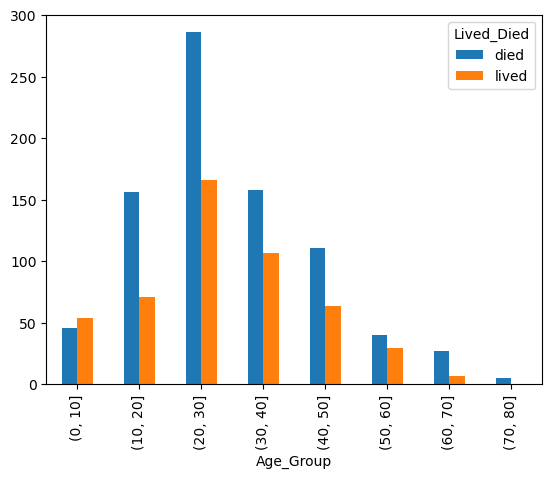

In [139]:
# Create bins for age 0-10 11-20 21-30 31-40 41-50 51-60 61-70 71-80
passengers_df['Age_Group'] = pd.cut(passengers_df['Age'], range(0, 81, 10))
contingency_table = pd.crosstab(passengers_df['Age_Group'], passengers_df['Lived_Died'])
print(contingency_table)
print(f'Chi2-Stats: {stats.chi2_contingency(contingency_table)}')
# Plot it 
contingency_table.plot(kind='bar')


<bound method DataFrame.pivot_table of                                         Name    Born    Died       Age  \
0       DEAN, Miss Elizabeth Gladys Millvina  1912.0  2009.0  0.166667   
1     DANBOM, Master Gilbert Sigvard Emanuel  1911.0  1912.0  0.333333   
2                       TANNūS, Master As'ad  1911.0  1931.0  0.416667   
3              PEACOCK, Master Albert Edward  1911.0  1912.0  0.583333   
4             RICHARDS, Master Sibley George  1911.0  1987.0  0.750000   
...                                      ...     ...     ...       ...   
1347                       FLETCHER, Miss N.     NaN     NaN       NaN   
1348                      STEVENS, Mr George     NaN     NaN       NaN   
1349                  CARRUTHERS, Mr Francis     NaN     NaN       NaN   
1350                              COLLIS, Mr     NaN     NaN       NaN   
1351                      WILDING, Mr Edward     NaN     NaN       NaN   

      Gender  Passenger_Class Lived_Died                                

ValueError: Must pass 2-d input. shape=()

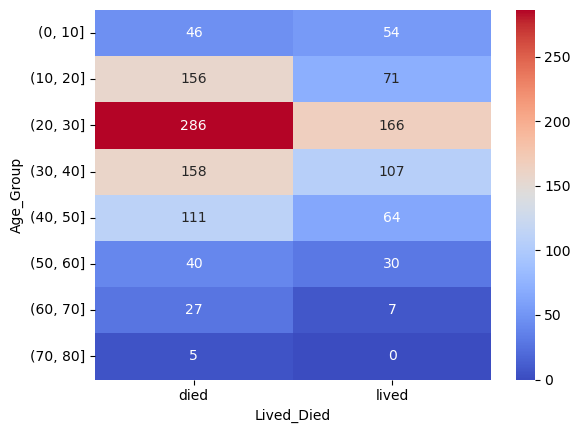

In [143]:
# Create a heat map 
passengers_df['Age_Group'] = pd.cut(passengers_df['Age'], range(0, 81, 10))
# Use a pivot table